<a href="https://colab.research.google.com/github/jasonyang429/Shallow-CNN-for-CIFAR10/blob/main/CNN_for_CIFAR_10_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Classification on CIFAR-10 Datasets**



In [54]:
# Importing neccessary modules and API
import tensorflow as tf
import numpy as np
print(tf.__version__)
from keras import datasets as ds
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()

2.3.0


In [55]:
# Convert labels to one-hot encoded labels
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_test_oh = tf.keras.utils.to_categorical(y_test)

# Normalize inputs
x_train = x_train/255.
x_test = x_test/255.

# Print shape of training sets
print(x_train.shape)

(50000, 32, 32, 3)


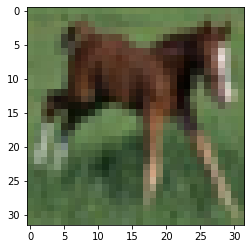

[7]
horse


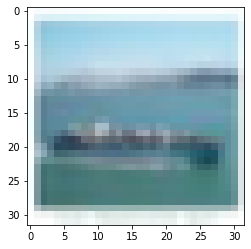

[8]
ship


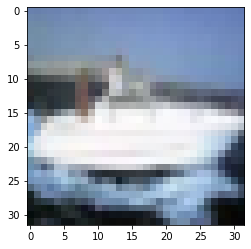

[8]
ship


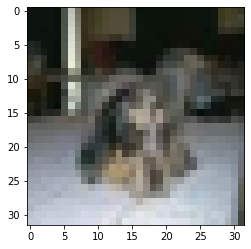

[5]
dog


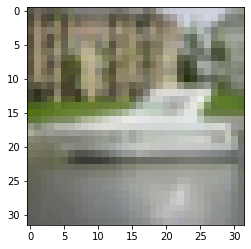

[8]
ship


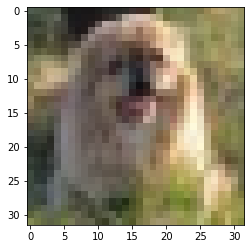

[5]
dog


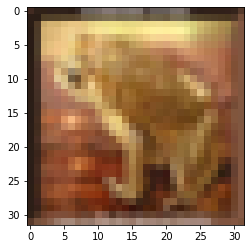

[6]
frog


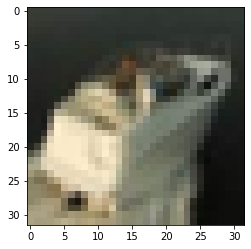

[8]
ship


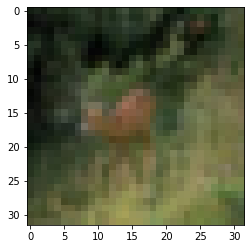

[4]
deer


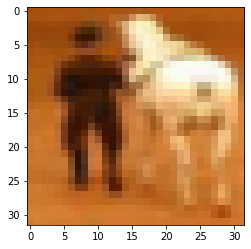

[7]
horse


In [66]:
# Function to get the names of each classes
def label_name(label):
  labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  return labels[label[0]]

# Showing random images with labels and names
for i in range(10):
  random_img = np.random.randint(len(x_train))
  plt.imshow(x_train[random_img])
  plt.show()
  print(y_train[random_img])
  print(label_name(y_train[random_img]))

In [68]:
# Print the neccessary informations from the datasets
print("Number of classes:", len(np.unique(y_train)))
print("Total number of training sets:", len(x_train))
print("Image shape:", x_train[0].shape)

Number of classes: 10
Total number of training sets: 50000
Image shape: (32, 32, 3)


In [76]:
# First model with ~95% train accuracy & ~70% validation accuracy
# Overfitting
# Comes with
# 3 Convolutional Layers followed by Max Pooling layers and Batch Norm layers
# 1 Flatten layer to flatten the outputs of Conv layers to Dense layer
# 3 Dense layers without Dropout
# Last layer with softmax activation to get probability for each class
# ReLU activations used to prevent vanishing gradients
# Although the network is not deep enough to have vanishing gradients
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(128, (3,3), 1, input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3,3), 1, activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3,3), 1, activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu', kernel_initializer=tf.keras.initializers.he_normal),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.he_normal),
        tf.keras.layers.Dense(10, activation='softmax')
])

# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          1

In [125]:
# 2nd model
# Reduced 1 Conv layer to prevent overfitting
# Added Dropout as regularizer
# Reduced the number of neurons for the first Dense layer from 512 to 256
# Added another last Dense layer with 32 neurons
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(128, (3,3), 1, input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3,3), 1, activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_normal),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.he_normal),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.he_normal),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(10, activation='softmax')
])

# Print the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [126]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_oh, epochs=10, verbose=1, validation_data=(x_test, y_test_oh))
# First model with 50 epochs
# After 15 epochs, model ended with ~95% train accuracy and ~70% validation accuracy
# The rest epochs doesnt change anything
# Overfitting happens

# 2nd trial with 10 epochs
# Added Dropout
# Reduced 1 Conv layer
# Added 1 Fully connected layer
# ~81% training accuracy and ~71% validation accuracy
# Better than first model
# Reduced overfitting
# Difference between training accuracy and validation accuracy ~10%
# Model able to generalize better


Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6083 - accuracy: 0.4149 - val_loss: 1.3399 - val_accuracy: 0.5221
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2553 - accuracy: 0.5561 - val_loss: 1.1264 - val_accuracy: 0.6070
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0762 - accuracy: 0.6246 - val_loss: 1.2068 - val_accuracy: 0.5810
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9481 - accuracy: 0.6735 - val_loss: 1.0214 - val_accuracy: 0.6479
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8540 - accuracy: 0.7057 - val_loss: 0.9123 - val_accuracy: 0.6881
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7726 - accuracy: 0.7344 - val_loss: 0.9242 - val_accuracy: 0.6914
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7035 - accuracy: 0.7585 - val_loss: 0.8668 - val_accuracy:

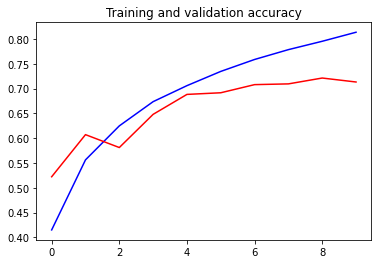

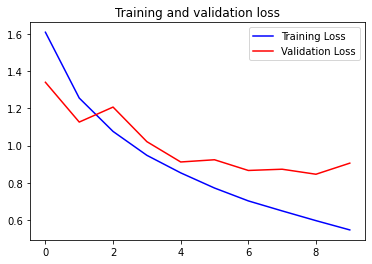

In [127]:
# Plotting the graph
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Validation curve varying
# Resolve overfitting by adding regularization and train for about 15 epochs
# Not smooth curve on validation as epochs was lesser
# Training accuracy and validation accuracy has ~10% difference